In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [26]:
diab = pd.read_csv('https://raw.githubusercontent.com/NeilPandey/Test_Dataset/master/diabetes.csv')

In [27]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
diab.isnull().sum()/100*diab.shape[0]

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

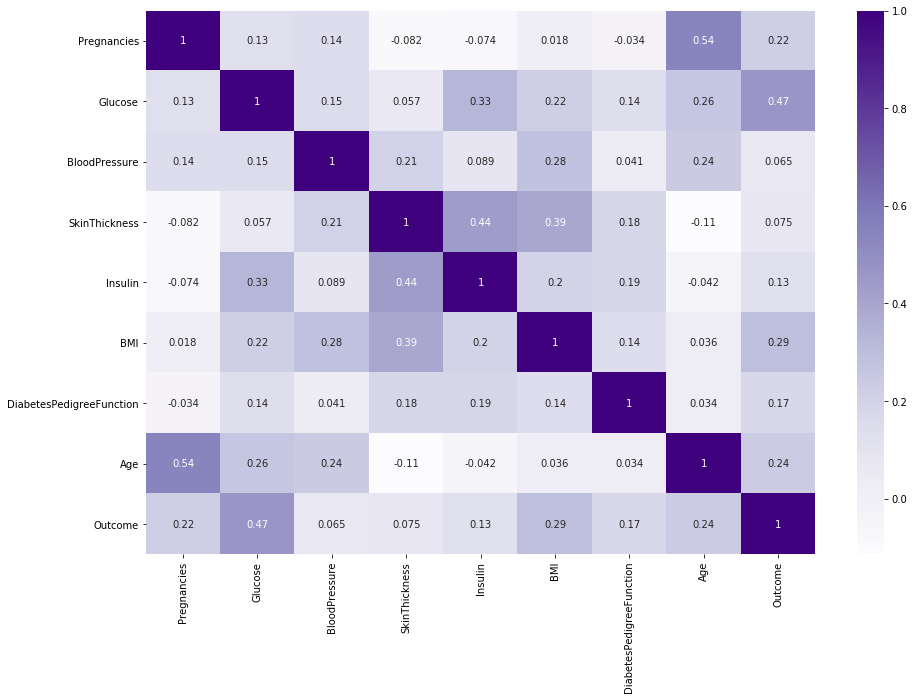

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(diab.corr(), cmap = 'Purples', annot = True)


In [31]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [32]:
X2 = diab.drop(['Outcome'], axis = 1)

In [33]:
y = diab['Outcome']

In [34]:
X1 = sm.add_constant(X2)

In [35]:
X1.head()

,const,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,6,148,72,35,0,33.6,0.627,50
1,1.0,1,85,66,29,0,26.6,0.351,31
2,1.0,8,183,64,0,0,23.3,0.672,32
3,1.0,1,89,66,23,94,28.1,0.167,21
4,1.0,0,137,40,35,168,43.1,2.288,33


In [36]:
model = sm.OLS(y,X1).fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           7.36e-55
Time:                        10:33:46   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8539      0.085     -9.989      0.000      -1.022      -0.686
Pregnancies                  0.0206      0.005      4.014      0.000       0.011       0.031
Glucose                      0.0059      0.001     11.493      0.000       0.005       0.007
BloodPressure               -0.0023      0.001     -2.873      0.004      -0.004      -0.001
SkinThickness                0.0002      0.001      0.139      0.890      -0.002       0.002
Insulin                     -0.0002      0.000     -1.205      0.229      -0.000       0.000
BMI                          0.0132      0.002      6.344      0.000       0.009       0.017
DiabetesPedigreeFunction     0.1472      0.045      3.268      0.001       0.059       0.236
Age                          0.0026      0.002      1.693      0.091      -0.000       0.006
==============================================================================
Omnibus:                       41.539   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.183
Skew:                           0.395   Prob(JB):                     1.69e-07
Kurtosis:                       2.408   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
X_feat = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']

In [39]:
X = diab[X_feat]

In [40]:
y = diab['Outcome']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logreg = LogisticRegression()

In [44]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
from sklearn import metrics
y_pred = logreg.predict(X_test)

In [48]:
cnf_met = metrics.confusion_matrix(y_test,y_pred)

In [49]:
cnf_met

array([[144,  13],
       [ 35,  39]], dtype=int64)

In [50]:
print("Accuracy :", metrics.accuracy_score(y_test,y_pred))

('Accuracy :', 0.7922077922077922)


In [51]:
print("Precision :", metrics.precision_score(y_test,y_pred))

('Precision :', 0.75)


In [52]:
print("Recall :", metrics.recall_score(y_test,y_pred))

('Recall :', 0.527027027027027)
